In [256]:
#Import datasets blobs
from sklearn.datasets import make_blobs

#feature menyimpan numpy array 2 dimensi, true_label berisikan cluster dari setiap data
#make_blobs digunakan untuk membuat sample data secara acak
features, true_labels= make_blobs(n_samples=200, centers=3, cluster_std=2, random_state=24)

#n_samples=200 : Jumlah sample point yang akan dibuat, dibagi rata untuk tiap cluster
#centers :  Jumlah center yang akan dibuat
#cluster_std : Standar deviasi dari tiap cluster
#random_state : Menentukan pembangkitan nilai acak saat pembuatan data

In [257]:
#Melihat isi array features
print(features[:5])

[[-5.75171112  6.5027957 ]
 [-2.97777674  7.13755966]
 [ 9.95991169 -6.60734575]
 [11.26144673  4.22643687]
 [-1.63010612  5.7419855 ]]


In [258]:
#Melihat isi dari array true_labels
print(true_labels[:5])

[2 2 1 0 2]


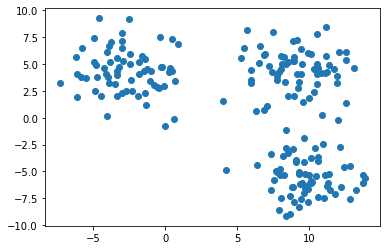

In [259]:
import matplotlib.pyplot as plt

#Menampug data dimensi pertama features xs
xs = [x[0] for x in features]

#Menampung data dimensi pertama features ys
ys = [x[1] for x in features]

plt.scatter(xs,ys)

In [260]:
#import StandardaScaler untuk feature scaling
from sklearn.preprocessing import StandardScaler

#Transformasi fitur
standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features)

In [261]:
#import K-Means unuk mengimplemenasikan K-Means Clustering
from sklearn.cluster import KMeans

#mengimpleentasikan KMeans dengan membagi daat kedalam 3 cluster
kmeans = KMeans(n_clusters=3, random_state=24)

#Melakukan perhitungan cluster center, kemudian melakukan prediksi cluster untuk setiap data
result = kmeans.fit_predict(scaled_features)

In [262]:
#Menampilkan posisi cluster center
kmeans.cluster_centers_

array([[-1.34460271,  0.65118721],
       [ 0.72194241, -1.30598926],
       [ 0.6025916 ,  0.66452126]])

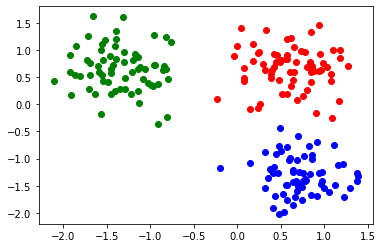

In [263]:
#Menampilkan data dan label clusternya, warna green cluster= 0, blue = 1, red = 2
plt.scatter(scaled_features[result==0,0], scaled_features[result==0,1], c='green')
plt.scatter(scaled_features[result==1,0], scaled_features[result==1,1], c='blue')
plt.scatter(scaled_features[result==2,0], scaled_features[result==2,1], c='red')

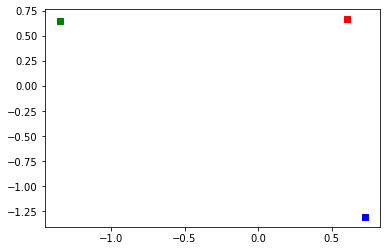

In [264]:
#Menampilkan posisi cluster center
plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='green', marker='s')
plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], c='blue', marker='s')
plt.scatter(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], c='red', marker='s')

In [265]:
#Analisa Recency(Transaksi Terakhir), Frequency (Berapa Banyak Transaksi), dan Monetary (Amount Transaksi) (RFM)
import pandas as pd
import numpy as np
data = pd.read_csv("Bookbinder RFM Data.csv")

In [266]:
data.head(10)

,acctnum,Recency,Frequency,Monetary Value
0,10001,11/11/2001,8,1790
1,10002,1/26/2002,3,560
2,10003,1/21/2003,2,390
3,10008,7/19/2003,8,1800
4,10009,11/29/2003,10,2070
5,10011,11/11/2003,2,390
6,10012,3/24/2003,2,410
7,10014,11/23/2003,3,580
8,10016,11/18/2003,1,220
9,10017,9/10/2003,3,600


In [267]:
#Data column dan rows 
data.shape

(33707, 4)

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33707 entries, 0 to 33706
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   acctnum         33707 non-null  int64 
 1   Recency         33707 non-null  object
 2   Frequency       33707 non-null  int64 
 3   Monetary Value  33707 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.0+ MB


In [269]:
data['Recency'] = pd.to_datetime(data['Recency'])
data['Recency'] = round(pd.to_numeric(data['Recency']), 8)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33707 entries, 0 to 33706
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   acctnum         33707 non-null  int64
 1   Recency         33707 non-null  int64
 2   Frequency       33707 non-null  int64
 3   Monetary Value  33707 non-null  int64
dtypes: int64(4)
memory usage: 1.0 MB


In [270]:
data.head(5)

,acctnum,Recency,Frequency,Monetary Value
0,10001,1005436800000000000,8,1790
1,10002,1012003200000000000,3,560
2,10003,1043107200000000000,2,390
3,10008,1058572800000000000,8,1800
4,10009,1070064000000000000,10,2070


In [271]:
data['Recency'] = data['Recency']/100000000000

In [272]:
data['Recency'] = data['Recency'].astype(np.int64)
data.head(5)

,acctnum,Recency,Frequency,Monetary Value
0,10001,10054368,8,1790
1,10002,10120032,3,560
2,10003,10431072,2,390
3,10008,10585728,8,1800
4,10009,10700640,10,2070


In [273]:
data.describe()

,acctnum,Recency,Frequency,Monetary Value
count,33707.000000,3.370700e+04,33707.000000,33707.000000
mean,34987.004064,1.047400e+07,4.824992,955.356751
std,14422.387849,1.929024e+05,3.153176,627.076989
min,10001.000000,9.893664e+06,1.000000,220.000000
25%,22522.500000,1.042675e+07,2.000000,410.000000
50%,34938.000000,1.052870e+07,4.000000,740.000000
75%,47469.000000,1.059350e+07,8.000000,1480.000000
max,60000.000000,1.070150e+07,12.000000,2420.000000


In [274]:
data.isnull().any().any() #Mengecek nilai null

False

In [275]:
RFM = data.drop(["acctnum"],axis=1) #Menghapus kolom acctnum

In [276]:
RFM.head(5)

,Recency,Frequency,Monetary Value
0,10054368,8,1790
1,10120032,3,560
2,10431072,2,390
3,10585728,8,1800
4,10700640,10,2070


In [277]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33707 entries, 0 to 33706
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Recency         33707 non-null  int64
 1   Frequency       33707 non-null  int64
 2   Monetary Value  33707 non-null  int64
dtypes: int64(3)
memory usage: 790.1 KB


In [278]:
RFM['Recency'] = RFM['Recency'].astype(np.int64) #Mengubah float64 menjadi int64

In [279]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33707 entries, 0 to 33706
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Recency         33707 non-null  int64
 1   Frequency       33707 non-null  int64
 2   Monetary Value  33707 non-null  int64
dtypes: int64(3)
memory usage: 790.1 KB


In [280]:
RFM.head(5)

,Recency,Frequency,Monetary Value
0,10054368,8,1790
1,10120032,3,560
2,10431072,2,390
3,10585728,8,1800
4,10700640,10,2070


In [281]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler() #Variabel yang berisi tentang standard deviasi 
RFM_ss = standard_scaler.fit_transform(RFM)
RFM_ss = pd.DataFrame(RFM_ss) #Menjadikan RFM_ss menjadi sebuah Data Frame
RFM_ss.head()

,0,1,2
0,-2.175374,1.006939,1.331026
1,-1.834969,-0.578787,-0.630485
2,-0.222524,-0.895933,-0.901588
3,0.579220,1.006939,1.346973
4,1.174929,1.641229,1.777549


In [282]:
RFM_ss.columns = ['Recency', 'Frequency', 'Monetary Value'] #Mengubah 0, 1, 2 menjadi nama column yang tertera

In [283]:
RFM_ss.head(5)

,Recency,Frequency,Monetary Value
0,-2.175374,1.006939,1.331026
1,-1.834969,-0.578787,-0.630485
2,-0.222524,-0.895933,-0.901588
3,0.579220,1.006939,1.346973
4,1.174929,1.641229,1.777549


In [284]:
#import Kmeans
from sklearn.cluster import KMeans

#Mengatur pparameter k-means,jumlah cluster yang akan dibentuk n = 3
k_meanss = KMeans(n_clusters=3, random_state=0)
k_meanss.fit(RFM_ss)

KMeans(n_clusters=3, random_state=0)

In [285]:
#Menyimpan hasil prediksi label clusters untuk setiap data
pred = k_meanss.predict(RFM_ss)
pred

array([2, 2, 1, ..., 0, 2, 2])

In [286]:
RFM_labeled = pd.concat([data, pd.Series(pred).rename('Cluster')], axis=1) #Mengabungkan data data dengan hasil pred

In [287]:
RFM_labeled.head(5)

,acctnum,Recency,Frequency,Monetary Value,Cluster
0,10001,10054368,8,1790,2
1,10002,10120032,3,560,2
2,10003,10431072,2,390,1
3,10008,10585728,8,1800,0
4,10009,10700640,10,2070,0


In [288]:
RFM_labeled['Cluster'].value_counts().sort_values() #Menghitung jumlah per cluster

2     4776
0    11879
1    17052
Name: Cluster, dtype: int64

# Analisis Data

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Cluster', ylabel='Monetary Value'>

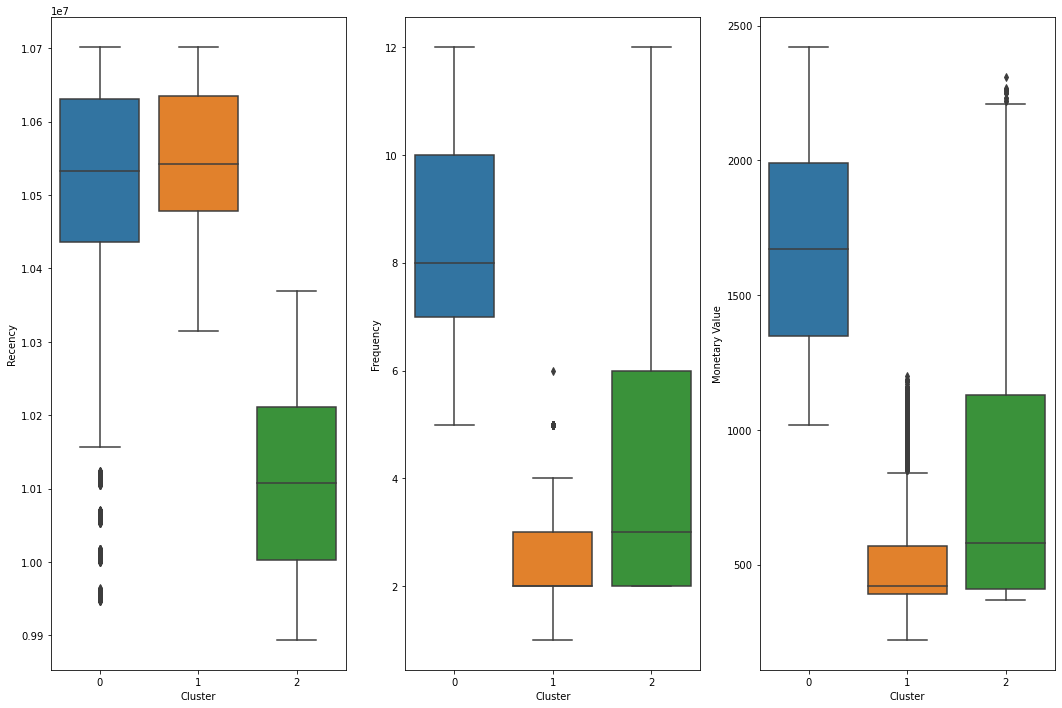

In [350]:
fig,ax = plt.subplots(1,3, figsize=(18,12)) #Membuat kerangka layar visualisasi
sns.boxplot(x = 'Cluster', y = 'Recency', data = RFM_labeled, ax = ax[0])
sns.boxplot(x = 'Cluster', y = 'Frequency', data = RFM_labeled, ax = ax[1])
sns.boxplot(x = 'Cluster', y = 'Monetary Value', data = RFM_labeled, ax =ax[2])